In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

today = pd.Timestamp('today').date()
now = pd.Timestamp('now')

# Reading CSV strings with different date formats
csv1 = pd.DataFrame({
    'date': ['2022-01-02'],
    'datetime': ['2022-01-02 05:12']
})
csv1['date'] = pd.to_datetime(csv1['date'])
csv1['datetime'] = pd.to_datetime(csv1['datetime'])

csv2 = pd.DataFrame({
    'date': ['01/02/15']
})
csv2['date'] = pd.to_datetime(csv2['date'], format='%m/%d/%y')

csv3 = pd.DataFrame({
    'date': ['31/01/15']
})
csv3['date'] = pd.to_datetime(csv3['date'], format='%d/%m/%y')

csv4 = pd.DataFrame({
    'date': ['15/01/31']
})
csv4['date'] = pd.to_datetime(csv4['date'], format='%y/%m/%d')

# Parsing dates with different formats
ymd = pd.to_datetime("2017-01-31")
mdy = pd.to_datetime("January 31st, 2017")
dmy = pd.to_datetime("31-Jan-2017")

ymd_hms = pd.to_datetime("2017-01-31 20:11:59")
mdy_hm = pd.to_datetime("01/31/2017 08:01")
ymd_utc = pd.to_datetime("2017-01-31", utc=True)
print(ymd_utc)
print("ymd format:", ymd)
print("mdy format:", mdy)
print("dmy format:", dmy)

2017-01-31 00:00:00+00:00
ymd format: 2017-01-31 00:00:00
mdy format: 2017-01-31 00:00:00
dmy format: 2017-01-31 00:00:00


/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_4164/3635076876.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights_dt["dep_delay"], label="Departure Delay")
/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_4164/3635076876.py:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

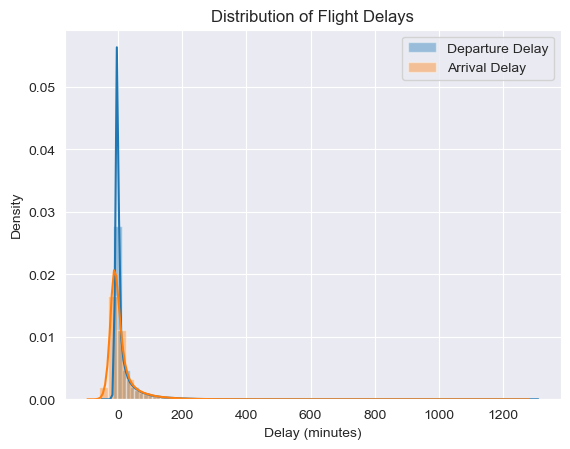

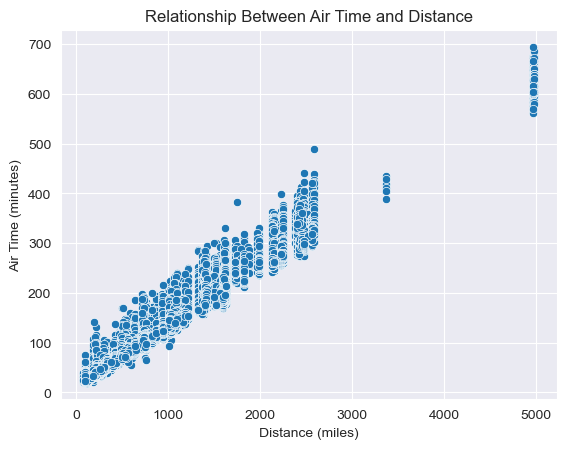

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the flights.csv file into a Pandas DataFrame
flights = pd.read_csv("data/flights.csv")

# Select the relevant columns
flights = flights[[
    "year",
    "month",
    "day",
    "hour",
    "minute",
    "origin",
    "dest",
    "dep_delay",
    "arr_delay",
    "air_time",
    "distance",
]]

# Create a datetime object for the departure and arrival times
flights["dep_time"] = pd.to_datetime(flights[["year", "month", "day", "hour", "minute"]])
flights["arr_time"] = pd.to_datetime(flights[["year", "month", "day", "hour", "minute"]])

# Filter out flights with missing departure or arrival times
flights = flights.dropna(subset=["dep_time", "arr_time"])

# Create a new DataFrame with only the origin, destination, and delay columns
flights_dt = flights[[
    "origin",
    "dest",
    "dep_delay",
    "arr_delay",
    "air_time",
    "distance",
]]

# Plot the distribution of departure and arrival delays
sns.distplot(flights_dt["dep_delay"], label="Departure Delay")
sns.distplot(flights_dt["arr_delay"], label="Arrival Delay")
plt.xlabel("Delay (minutes)")
plt.ylabel("Density")
plt.title("Distribution of Flight Delays")
plt.legend()
plt.show()

# Plot the relationship between air time and distance
sns.scatterplot(x="distance", y="air_time", data=flights_dt)
plt.xlabel("Distance (miles)")
plt.ylabel("Air Time (minutes)")
plt.title("Relationship Between Air Time and Distance")
plt.show()

In [31]:
from bokeh.plotting import figure, show

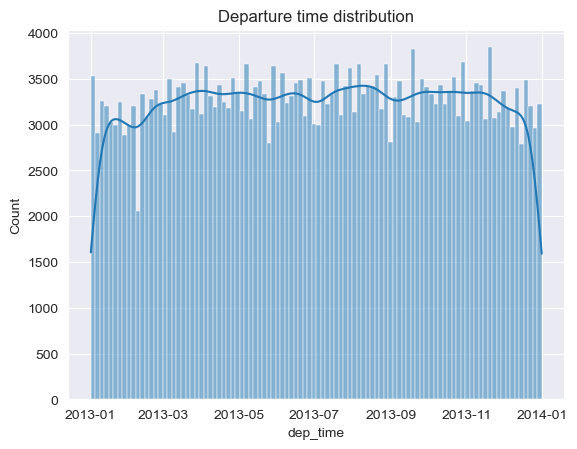

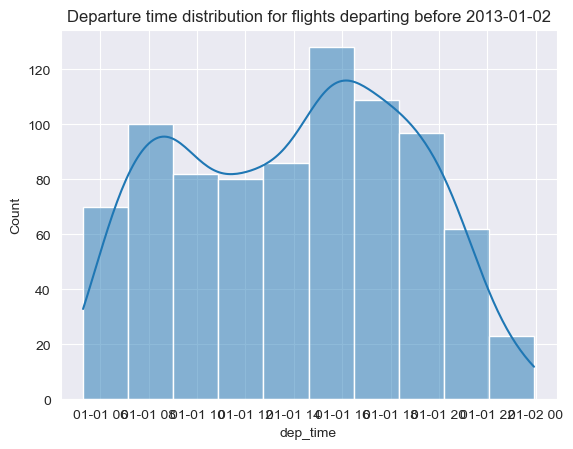

In [65]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# def make_datetime_100(year, month, day, time):
#   """Converts a time string in the format "HHMM" to a datetime object.
# 
#   Args:
#     year: The year.
#     month: The month.
#     day: The day.
#     time: The time in the format "HHMM".
# 
#   Returns:
#     A datetime object.
#   """
#   # year = pd.to_numeric(year)
#   # month = pd.to_numeric(month)
#   # day_l = pd.to_numeric(day)
#   time = pd.to_numeric(time)
#   # hour = time / 100
#   # minute = time % 100
#   # return pd.Timestamp(f"{year}-{month}-{day} {hour}:{minute}:00")
#   hour = time // 100
#   minute = time % 100 
#   s1 = pd.Timestamp(f"{year}-{month}-{day} {hour}:{minute}:00")
#   return pd.Timestamp(f"{year}-{month}-{day} {hour}:{minute}:00")

def make_datetime_100(year, month, day, time):
    """Converts time strings in the format "HHMM" to datetime objects for Series.

    Args:
      year: A Series of years.
      month: A Series of months.
      day: A Series of days.
      time: A Series of times in the format "HHMM".

    Returns:
      A Series of datetime objects.
    """
    # Calculate hours and minutes as Series
    hours = (time // 100).astype(int) % 24
    minutes = (time % 100).astype(int)
    
    # Create a datetime Series using pd.to_datetime
    datetimes = pd.to_datetime(year.astype(str) + '-' + 
                               month.astype(str).str.zfill(2) + '-' + 
                               day.astype(str).str.zfill(2) + ' ' + 
                               hours.astype(str).str.zfill(2) + ':' + 
                               minutes.astype(str).str.zfill(2) + ':00')
    return datetimes

# Read the flights.csv file into a pandas DataFrame.
flights_df = pd.read_csv("flights.csv")

# Filter out rows with missing values in the dep_time or arr_time column.
flights_df = flights_df.dropna(subset=["dep_time", "arr_time"])

# Create datetime objects for the dep_time, arr_time, sched_dep_time, and sched_arr_time columns.
flights_df["dep_time"] = make_datetime_100(flights_df["year"], flights_df["month"], flights_df["day"], flights_df["dep_time"])
flights_df["arr_time"] = make_datetime_100(flights_df["year"], flights_df["month"], flights_df["day"], flights_df["arr_time"])
flights_df["sched_dep_time"] = make_datetime_100(flights_df["year"], flights_df["month"], flights_df["day"], flights_df["sched_dep_time"])
flights_df["sched_arr_time"] = make_datetime_100(flights_df["year"], flights_df["month"], flights_df["day"], flights_df["sched_arr_time"])

# Select the origin, dest, delay, and time columns.
flights_dt_df = flights_df[["origin", "dest", "dep_delay", "arr_delay", "dep_time", "arr_time"]]

# Create a frequency polygon plot of the departure times.
sns.histplot(data=flights_dt_df, x="dep_time", kde=True, bins=100)
plt.title("Departure time distribution")
plt.show()

# Filter the data to only include flights that departed before January 2, 2013.
flights_dt_df_filtered = flights_dt_df[flights_dt_df["dep_time"] < pd.Timestamp("2013-01-02")]

# Create a frequency polygon plot of the departure times for the filtered data.
sns.histplot(data=flights_dt_df_filtered, x="dep_time", kde=True, bins=10)
plt.title("Departure time distribution for flights departing before 2013-01-02")
plt.show()


/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_4164/3635076876.py:41: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(flights_dt["dep_delay"], label="Departure Delay")
/var/folders/fw/m5f2ykhd1yzc0yxvp3g1vy180000gp/T/ipykernel_4164/3635076876.py:42: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns

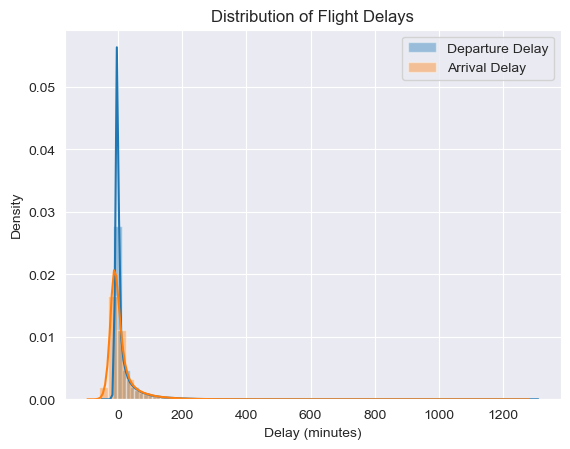

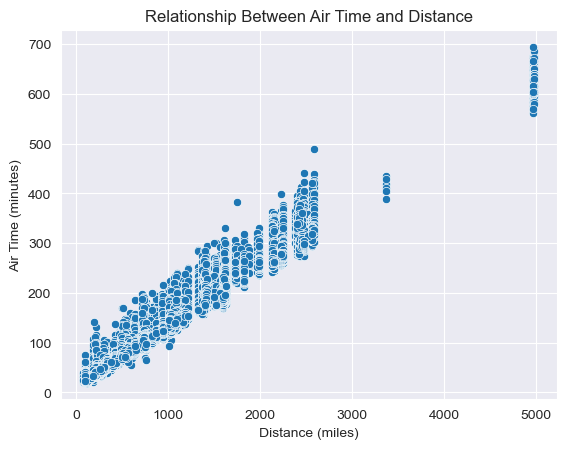

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the flights.csv file into a Pandas DataFrame
flights = pd.read_csv("flights.csv")

# Select the relevant columns
flights = flights[[
    "year",
    "month",
    "day",
    "hour",
    "minute",
    "origin",
    "dest",
    "dep_delay",
    "arr_delay",
    "air_time",
    "distance",
]]

# Create a datetime object for the departure and arrival times
flights["dep_time"] = pd.to_datetime(flights[["year", "month", "day", "hour", "minute"]])
flights["arr_time"] = pd.to_datetime(flights[["year", "month", "day", "hour", "minute"]])

# Filter out flights with missing departure or arrival times
flights = flights.dropna(subset=["dep_time", "arr_time"])

# Create a new DataFrame with only the origin, destination, and delay columns
flights_dt = flights[[
    "origin",
    "dest",
    "dep_delay",
    "arr_delay",
    "air_time",
    "distance",
]]

# Plot the distribution of departure and arrival delays
sns.distplot(flights_dt["dep_delay"], label="Departure Delay")
sns.distplot(flights_dt["arr_delay"], label="Arrival Delay")
plt.xlabel("Delay (minutes)")
plt.ylabel("Density")
plt.title("Distribution of Flight Delays")
plt.legend()
plt.show()

# Plot the relationship between air time and distance
sns.scatterplot(x="distance", y="air_time", data=flights_dt)
plt.xlabel("Distance (miles)")
plt.ylabel("Air Time (minutes)")
plt.title("Relationship Between Air Time and Distance")
plt.show()

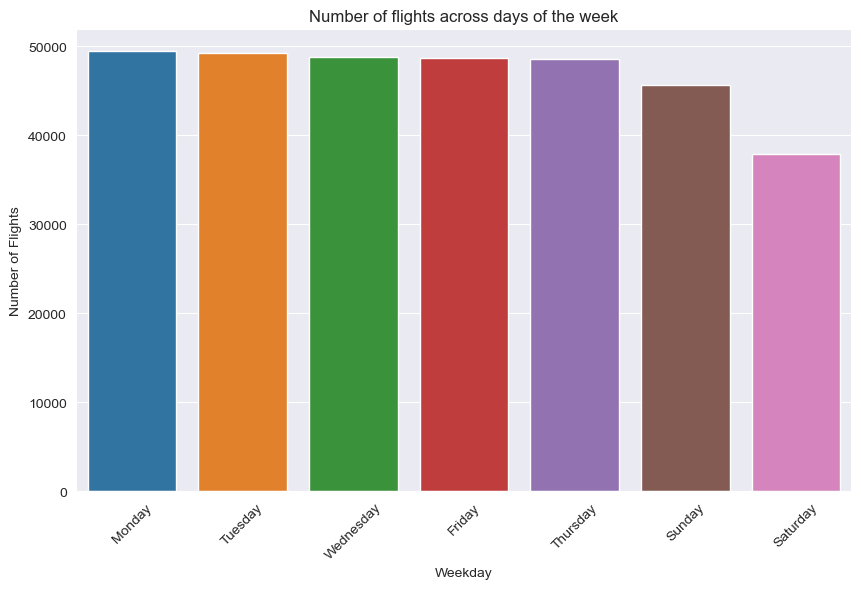

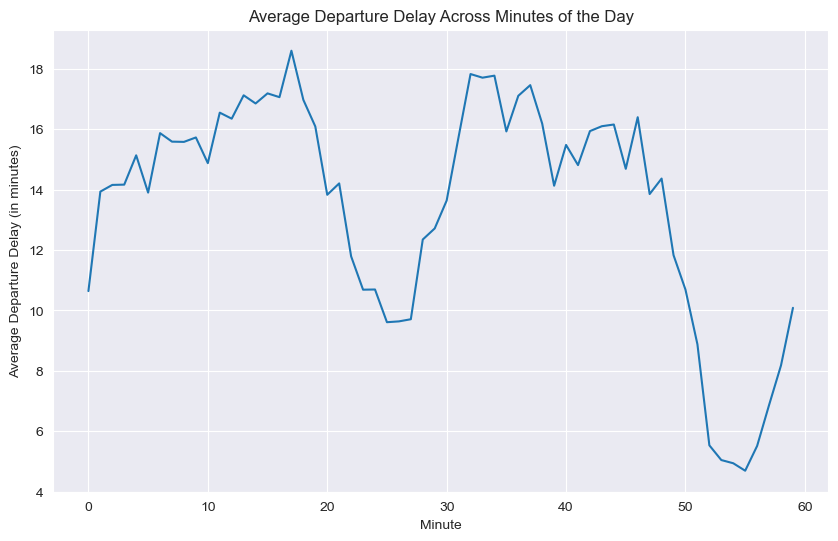

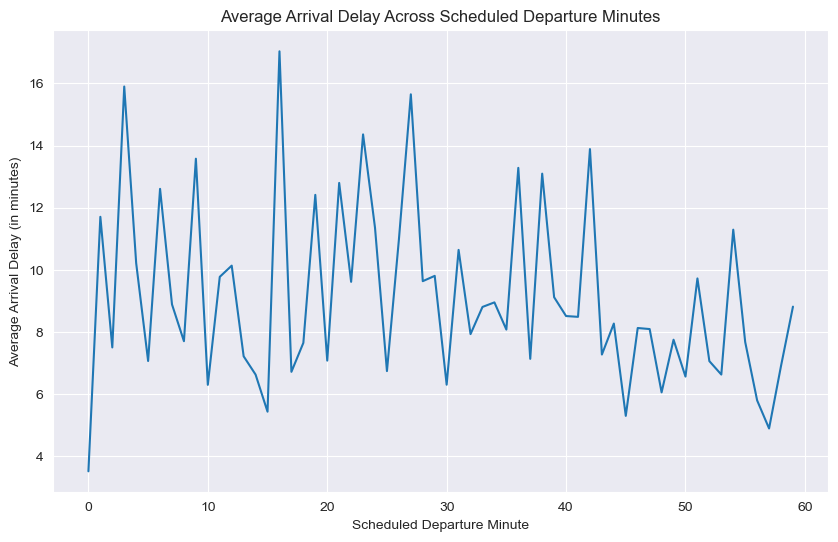

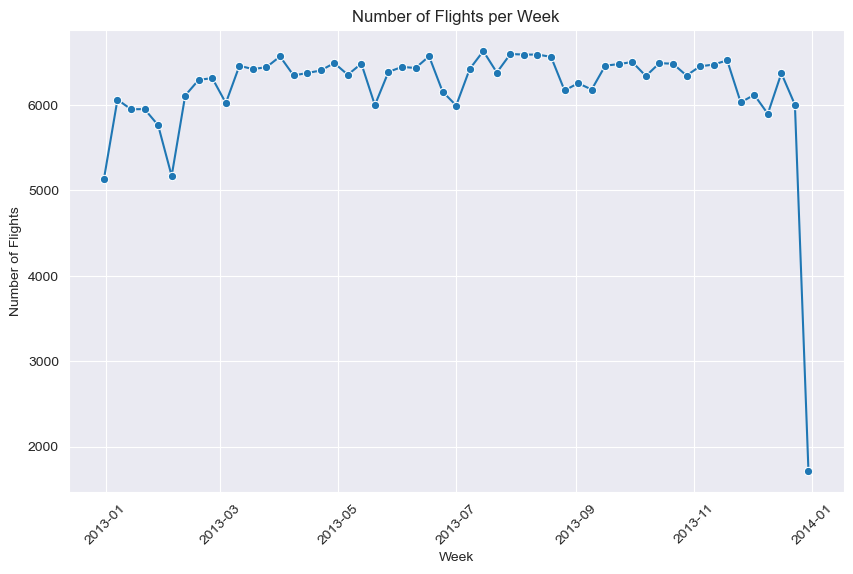

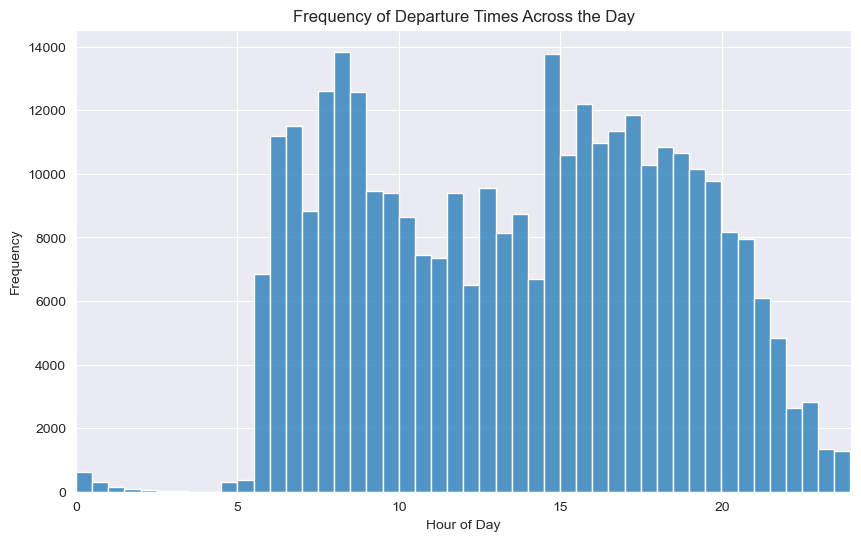

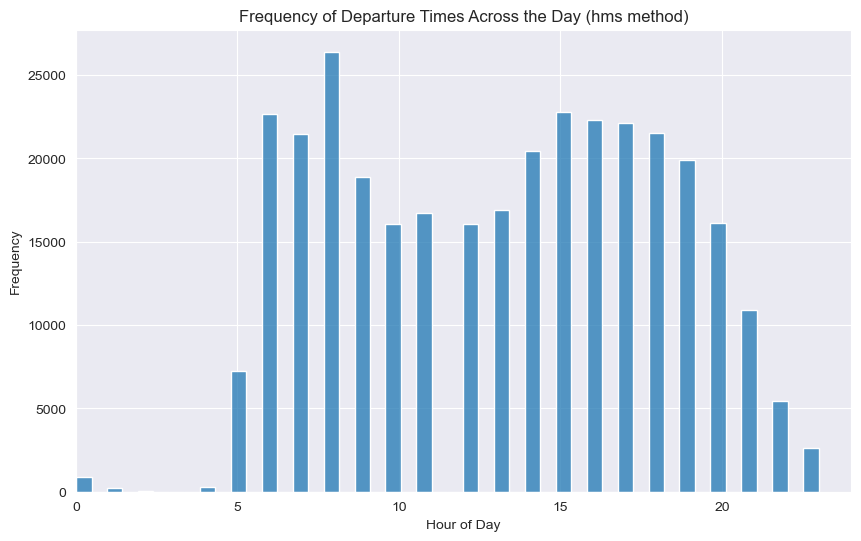

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import seaborn as sns

# Convert dep_time and sched_dep_time to datetime
flights_df['dep_time'] = pd.to_datetime(flights_df['dep_time'])
flights_df['sched_dep_time'] = pd.to_datetime(flights_df['sched_dep_time'])

# 1. Plotting the number of flights across days of the week
flights_df['wday'] = flights_df['dep_time'].dt.day_name()
plt.figure(figsize=(10, 6))
sns.countplot(x='wday', data=flights_df, order=flights_df['wday'].value_counts().index)
plt.title('Number of flights across days of the week')
plt.xlabel('Weekday')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

# 2. Plotting average departure delay across minutes of the day
flights_df['minute'] = flights_df['dep_time'].dt.minute
minute_delay = flights_df.groupby('minute').agg(avg_delay=('dep_delay', 'mean'), n=('dep_delay', 'size')).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='minute', y='avg_delay', data=minute_delay)
plt.title('Average Departure Delay Across Minutes of the Day')
plt.xlabel('Minute')
plt.ylabel('Average Departure Delay (in minutes)')
plt.show()

# 3. Plotting average arrival delay across scheduled departure minutes
flights_df['minute_sched_dep'] = flights_df['sched_dep_time'].dt.minute
sched_minute_delay = flights_df.groupby('minute_sched_dep').agg(avg_delay=('arr_delay', 'mean'), n=('arr_delay', 'size')).reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='minute_sched_dep', y='avg_delay', data=sched_minute_delay)
plt.title('Average Arrival Delay Across Scheduled Departure Minutes')
plt.xlabel('Scheduled Departure Minute')
plt.ylabel('Average Arrival Delay (in minutes)')
plt.show()

# 4. Plotting the number of flights per week
flights_df['week'] = flights_df['dep_time'].dt.to_period('W').apply(lambda r: r.start_time)
week_counts = flights_df.groupby('week').size().reset_index(name='n')

plt.figure(figsize=(10, 6))
sns.lineplot(x='week', y='n', data=week_counts, marker='o')
plt.title('Number of Flights per Week')
plt.xlabel('Week')
plt.ylabel('Number of Flights')
plt.xticks(rotation=45)
plt.show()

# 5. Plotting the frequency of departure times across the day
flights_df['dep_hour'] = flights_df['dep_time'].dt.hour + flights_df['dep_time'].dt.minute / 60

plt.figure(figsize=(10, 6))
sns.histplot(flights_df['dep_hour'], bins=int(24*60/30), kde=False)
plt.title('Frequency of Departure Times Across the Day')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xlim(0, 24)
plt.show()

# 6. Plotting the frequency of departure times across the day using a different method for dep_hour
flights_df['dep_hour_hms'] = (flights_df['dep_time'] - flights_df['dep_time'].dt.floor('d')).dt.total_seconds() // 3600

plt.figure(figsize=(10, 6))
sns.histplot(flights_df['dep_hour_hms'], bins=int(24*60/30), kde=False)
plt.title('Frequency of Departure Times Across the Day (hms method)')
plt.xlabel('Hour of Day')
plt.ylabel('Frequency')
plt.xlim(0, 24)
plt.show()


In [74]:
from pandas.tseries.offsets import DateOffset, Second, Minute, Hour, Day, MonthEnd, YearEnd
import pandas as pd
from datetime import timedelta

# Creating the initial datetime
datetime = pd.to_datetime("2026-07-08 12:34:56")

# Updating the year, month, and hour
datetime = datetime.replace(year=2030)
datetime = datetime.replace(month=1)
datetime += timedelta(hours=1)

# Using the update function equivalent in pandas
datetime_updated = datetime.replace(year=2030, month=2, day=2, hour=2)

# Dealing with impossible dates and hours
feb_first = pd.to_datetime("2023-02-01")
feb_30 = feb_first + MonthEnd(0)  # This will set to the last day of February
hours_400 = feb_first + timedelta(hours=400)  # Adding 400 hours to the date

# Calculating Hadley's age
hadleys_birthday = pd.to_datetime("1979-10-14")
today = pd.to_datetime("today")
h_age = today - hadleys_birthday

# Duration creation
fifteen_seconds = timedelta(seconds=15)
ten_minutes = timedelta(minutes=10)
twelve_hours = timedelta(hours=12)
twentyfour_hours = timedelta(hours=24)
zero_to_five_days = [timedelta(days=i) for i in range(6)]
three_weeks = timedelta(weeks=3)
two_years = timedelta(days=365*2)
one_year_weeks_hours = timedelta(days=365 + 12*7, hours=15)
tomorrow = today + timedelta(days=1)
last_year = today - timedelta(days=365)

# Handling DST
one_am = pd.to_datetime("2026-03-08 01:00:00").tz_localize('America/New_York')
one_am_plus_day = one_am + timedelta(days=1)

# Handling leap year and duration with months
leap_year_next_year = pd.to_datetime("2024-01-01") + DateOffset(years=1)
leap_year_plus_one_year = pd.to_datetime("2024-01-01") + YearEnd()

# Dealing with daylight saving time
one_am_plus_day_dst = one_am + timedelta(days=1)
one_am_plus_day_dst_norm = one_am + Day()

# Outputs
(datetime, datetime_updated, feb_30, hours_400, h_age, fifteen_seconds, ten_minutes, twelve_hours, twentyfour_hours, zero_to_five_days, three_weeks, two_years, one_year_weeks_hours, tomorrow, last_year, one_am, one_am_plus_day, leap_year_next_year, leap_year_plus_one_year, one_am_plus_day_dst, one_am_plus_day_dst_norm)


(Timestamp('2030-01-08 13:34:56'),
 Timestamp('2030-02-02 02:34:56'),
 Timestamp('2023-02-28 00:00:00'),
 Timestamp('2023-02-17 16:00:00'),
 Timedelta('16088 days 18:46:58.111640'),
 datetime.timedelta(seconds=15),
 datetime.timedelta(seconds=600),
 datetime.timedelta(seconds=43200),
 datetime.timedelta(days=1),
 [datetime.timedelta(0),
  datetime.timedelta(days=1),
  datetime.timedelta(days=2),
  datetime.timedelta(days=3),
  datetime.timedelta(days=4),
  datetime.timedelta(days=5)],
 datetime.timedelta(days=21),
 datetime.timedelta(days=730),
 datetime.timedelta(days=449, seconds=54000),
 Timestamp('2023-11-01 18:46:58.111640'),
 Timestamp('2022-10-31 18:46:58.111640'),
 Timestamp('2026-03-08 01:00:00-0500', tz='America/New_York'),
 Timestamp('2026-03-09 02:00:00-0400', tz='America/New_York'),
 Timestamp('2025-01-01 00:00:00'),
 Timestamp('2024-12-31 00:00:00'),
 Timestamp('2026-03-09 02:00:00-0400', tz='America/New_York'),
 Timestamp('2026-03-09 02:00:00-0400', tz='America/New_York'

In [75]:
# First, we need to load the flights data again since it was not stored from the previous execution.
flights_df = pd.read_csv('data/flights.csv')

# Convert arr_time and dep_time to datetime
flights_df['dep_time'] = pd.to_datetime(flights_df['dep_time'])
flights_df['arr_time'] = pd.to_datetime(flights_df['arr_time'])
flights_df['sched_arr_time'] = pd.to_datetime(flights_df['sched_arr_time'])

# Filtering the flights where arrival time is earlier than departure time, indicating an overnight flight
overnight_flights = flights_df[flights_df['arr_time'] < flights_df['dep_time']]

# Mutating the dataframe to add a flag for overnight flights and adjusting arrival and scheduled arrival times
flights_df['overnight'] = flights_df['arr_time'] < flights_df['dep_time']
flights_df.loc[flights_df['overnight'], 'arr_time'] += timedelta(days=1)
flights_df.loc[flights_df['overnight'], 'sched_arr_time'] += timedelta(days=1)

# Filtering again to check if any flights still have arrival time earlier than departure time
flights_df_filtered = flights_df[flights_df['arr_time'] < flights_df['dep_time']]

# Calculating the ratio of years to days
years_to_days_ratio = 365

# Outputs
overnight_flights, flights_df_filtered, years_to_days_ratio


(        year  month  day                      dep_time  sched_dep_time  \
 719     2013      1    1 1970-01-01 00:00:00.000001929            1920   
 725     2013      1    1 1970-01-01 00:00:00.000001939            1840   
 791     2013      1    1 1970-01-01 00:00:00.000002058            2100   
 794     2013      1    1 1970-01-01 00:00:00.000002102            2108   
 797     2013      1    1 1970-01-01 00:00:00.000002108            2057   
 ...      ...    ...  ...                           ...             ...   
 336753  2013      9   30 1970-01-01 00:00:00.000002145            2145   
 336754  2013      9   30 1970-01-01 00:00:00.000002147            2137   
 336762  2013      9   30 1970-01-01 00:00:00.000002233            2113   
 336763  2013      9   30 1970-01-01 00:00:00.000002235            2001   
 336769  2013      9   30 1970-01-01 00:00:00.000002349            2359   
 
         dep_delay                      arr_time                sched_arr_time  \
 719           9

In [80]:
import pytz

# Calculate the number of days in a year, which is 365 for a non-leap year and 366 for a leap year.
days_in_year = pd.Timestamp('2024-01-01') - pd.Timestamp('2023-01-01')
days_in_non_leap_year = days_in_year.days  # This will be 365
days_in_leap_year = (pd.Timestamp('2025-01-01') - pd.Timestamp('2024-01-01')).days  # This will be 366

# Get the current system timezone
system_timezone = pd.Timestamp.now().tz

# Get the number of Olson timezone names and the first few of them
olson_names = pytz.all_timezones
olson_names_count = len(olson_names)
olson_names_head = olson_names[:6]

# Create datetime objects with specified timezones
x1 = pd.Timestamp('2024-06-01 12:00:00').tz_localize('America/New_York')
x2 = pd.Timestamp('2024-06-01 18:00:00').tz_localize('Europe/Copenhagen')
x3 = pd.Timestamp('2024-06-02 04:00:00').tz_localize('Pacific/Auckland')

# Calculate the time differences between x1, x2, and x3
x1_x2_diff = (x1 - x2).total_seconds()  # This should account for timezone differences
x1_x3_diff = (x1 - x3).total_seconds()  # This should account for timezone differences

# Combine the datetimes into a single series and adjust timezones
x4 = pd.Series([x1, x2, x3])
# x4a = x4.dt.tz_convert('Australia/Lord_Howe')
# x4a_x4_diff = x4a - x4.dt.tz_convert(x4a.iloc[0].tz)  # Difference after converting timezones

# # Force the timezone without adjusting the time
# x4b = x4.dt.tz_localize(None).dt.tz_localize('Australia/Lord_Howe')
# x4b_x4_diff = x4b - x4.dt.tz_localize(None)  # Difference after forcing timezone

(days_in_non_leap_year, days_in_leap_year, system_timezone, olson_names_count, olson_names_head, x1, x2, x3, x1_x2_diff, x1_x3_diff, x4.tolist())


(365,
 366,
 None,
 596,
 ['Africa/Abidjan',
  'Africa/Accra',
  'Africa/Addis_Ababa',
  'Africa/Algiers',
  'Africa/Asmara',
  'Africa/Asmera'],
 Timestamp('2024-06-01 12:00:00-0400', tz='America/New_York'),
 Timestamp('2024-06-01 18:00:00+0200', tz='Europe/Copenhagen'),
 Timestamp('2024-06-02 04:00:00+1200', tz='Pacific/Auckland'),
 0.0,
 0.0,
 [Timestamp('2024-06-01 12:00:00-0400', tz='America/New_York'),
  Timestamp('2024-06-01 18:00:00+0200', tz='Europe/Copenhagen'),
  Timestamp('2024-06-02 04:00:00+1200', tz='Pacific/Auckland')])